In [17]:
import py_tiamat
import numpy
from matplotlib import pyplot
import itertools
from tqdm.notebook import tqdm

In [2]:
samples = py_tiamat.CircuitSamples(1024,3)

In [3]:
res = samples.get_nsector_submatrix([1,1,1],[1,1,1])
res.shape

(729, 729)

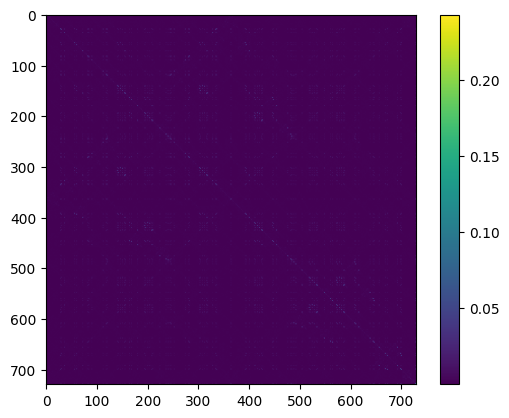

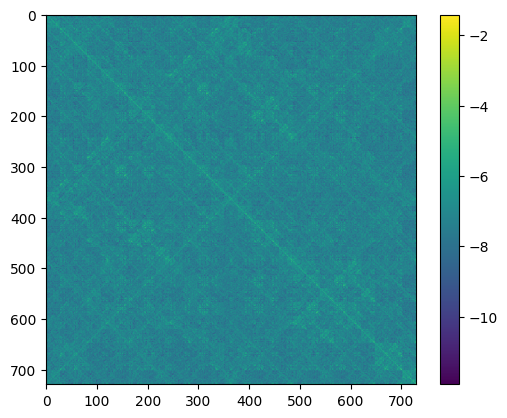

In [4]:
pyplot.imshow(numpy.abs(res))
pyplot.colorbar()
pyplot.show()

pyplot.imshow(numpy.log(numpy.abs(res)))
pyplot.colorbar()
pyplot.show()

In [5]:
numpy.linalg.eigvalsh(res)

array([-6.20472290e-02, -6.16247582e-02, -6.12700073e-02, -6.04342919e-02,
       -6.01148486e-02, -5.92134876e-02, -5.86245186e-02, -5.79574167e-02,
       -5.73521536e-02, -5.72594699e-02, -5.63456395e-02, -5.61308555e-02,
       -5.58790444e-02, -5.55777887e-02, -5.48731244e-02, -5.45593821e-02,
       -5.42883890e-02, -5.40147828e-02, -5.36179623e-02, -5.31509198e-02,
       -5.29581986e-02, -5.23016811e-02, -5.19615799e-02, -5.17380368e-02,
       -5.13872596e-02, -5.11162052e-02, -5.05870660e-02, -5.04724806e-02,
       -5.03291993e-02, -5.01089177e-02, -4.97355669e-02, -4.94631220e-02,
       -4.92306715e-02, -4.89543100e-02, -4.87061429e-02, -4.85631413e-02,
       -4.82735666e-02, -4.81718439e-02, -4.79415233e-02, -4.77335859e-02,
       -4.73201747e-02, -4.71755639e-02, -4.70690371e-02, -4.67595899e-02,
       -4.64136014e-02, -4.63431679e-02, -4.59625960e-02, -4.57844299e-02,
       -4.56566489e-02, -4.53107012e-02, -4.52283204e-02, -4.50185643e-02,
       -4.47253421e-02, -

In [3]:
def yield_vecs_up_to(N,start,end):
    if N == 1:
        for n in range(start,end):
            yield [n]
    else:
        for n in range(start,end):
            for s in yield_vecs_up_to(N-1,start,end):
                yield [n] + s

In [9]:
list(yield_vecs_up_to(2,0,4))

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [49]:
L = 4
M = L+1
k = 2

samples = py_tiamat.CircuitSamples(1024,L)

all_eigs = []
for nvec in tqdm(list(yield_vecs_up_to(k,0,M))):
    seen = set()
    for nbarvec in itertools.permutations(nvec):
        nbarvec = tuple(nbarvec)
        if nbarvec in seen:
            continue
        seen.add(nbarvec)
        submat = samples.get_nsector_submatrix(nvec, nbarvec)
        print(nvec, nbarvec, submat.shape)
        eigs = numpy.linalg.eigvalsh(submat)
        all_eigs.extend(eigs)
all_eigs = numpy.array(all_eigs)

  0%|          | 0/25 [00:00<?, ?it/s]

[0, 0] (0, 0) (1, 1)
[0, 1] (0, 1) (16, 16)
[0, 1] (1, 0) (16, 16)
[0, 2] (0, 2) (36, 36)
[0, 2] (2, 0) (36, 36)
[0, 3] (0, 3) (16, 16)
[0, 3] (3, 0) (16, 16)
[0, 4] (0, 4) (1, 1)
[0, 4] (4, 0) (1, 1)
[1, 0] (1, 0) (16, 16)
[1, 0] (0, 1) (16, 16)
[1, 1] (1, 1) (256, 256)
[1, 2] (1, 2) (576, 576)
[1, 2] (2, 1) (576, 576)
[1, 3] (1, 3) (256, 256)
[1, 3] (3, 1) (256, 256)
[1, 4] (1, 4) (16, 16)
[1, 4] (4, 1) (16, 16)
[2, 0] (2, 0) (36, 36)
[2, 0] (0, 2) (36, 36)
[2, 1] (2, 1) (576, 576)
[2, 1] (1, 2) (576, 576)
[2, 2] (2, 2) (1296, 1296)
[2, 3] (2, 3) (576, 576)
[2, 3] (3, 2) (576, 576)
[2, 4] (2, 4) (36, 36)
[2, 4] (4, 2) (36, 36)
[3, 0] (3, 0) (16, 16)
[3, 0] (0, 3) (16, 16)
[3, 1] (3, 1) (256, 256)
[3, 1] (1, 3) (256, 256)
[3, 2] (3, 2) (576, 576)
[3, 2] (2, 3) (576, 576)
[3, 3] (3, 3) (256, 256)
[3, 4] (3, 4) (16, 16)
[3, 4] (4, 3) (16, 16)
[4, 0] (4, 0) (1, 1)
[4, 0] (0, 4) (1, 1)
[4, 1] (4, 1) (16, 16)
[4, 1] (1, 4) (16, 16)
[4, 2] (4, 2) (36, 36)
[4, 2] (2, 4) (36, 36)
[4, 3] (4, 3

In [50]:
all_eigs.shape

(7990,)

In [51]:
sum(all_eigs > 0.95)

48